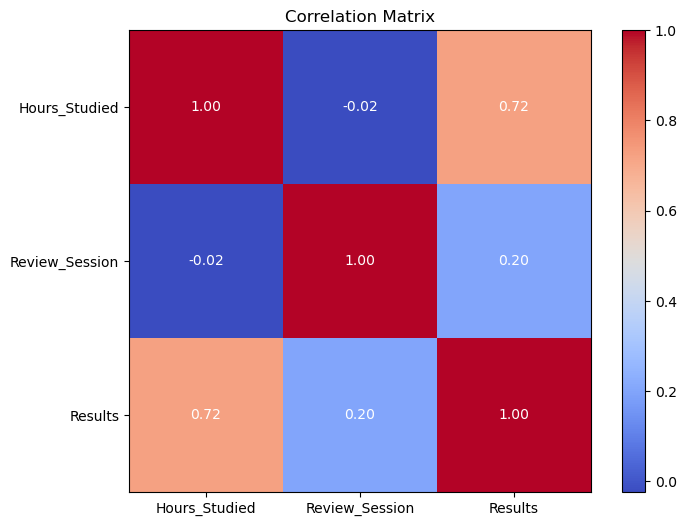

Model Coefficients:
Intercept: [-4.61182462]
Coefficients: [[1.36499215 1.87733756]]
Accuracy: 0.93
roc_auc_score:  0.9761029411764706


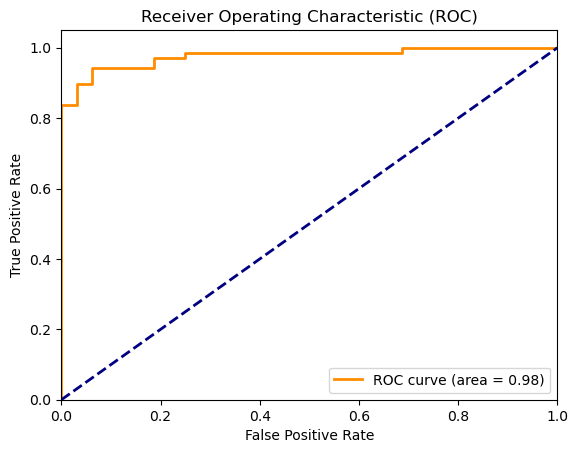

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

import seaborn as sns

data = pd.read_csv("student_data.csv")

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap for the correlation matrix with values using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar(cax)

# Display the actual values
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(j, i, "{:.2f}".format(corr_matrix.iat[i, j]), ha='center', va='center', color='w')

# Set the x and y axis labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns,rotation=0)
ax.set_yticklabels(corr_matrix.columns)
ax.xaxis.set_ticks_position('bottom')
plt.title("Correlation Matrix")
plt.show()







# (2) Fit a logistic regression model
# Define your features and Results variable
X = data.drop('Results', axis=1)
y = data['Results']



# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# (3) Output model coefficients and performance metrics
# Get the model coefficients (coefficients and intercept)
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Make predictions using the model
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC and plot ROC curve
y_probs = model.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_probs)
print('roc_auc_score: ', roc_auc)
fpr, tpr, _ = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('student_data.csv')

# Split your data into features (X) and the Results variable (y)
X = data.drop('Results', axis=1)
y = data['Results']

# (1) Fit an SVM model with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# (2) Fit an SVM model with an RBF kernel and find the best gamma using grid search
param_grid = {
    'C': [0.1, 1, 10],  # You can adjust the values of C as needed
    'gamma': [0.1, 1, 10]  # You can adjust the values of gamma as needed
}

svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X, y)

# Get the best gamma and C parameters
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']

# Fit the SVM model with the best parameters
svm_rbf_best = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_rbf_best.fit(X, y)

# Make predictions
y_pred_linear = svm_linear.predict(X)
y_pred_rbf_best = svm_rbf_best.predict(X)

# Calculate accuracy for linear kernel
accuracy_linear = accuracy_score(y, y_pred_linear)
print("Accuracy with Linear Kernel:", accuracy_linear)

# Calculate accuracy for RBF kernel with best parameters
accuracy_rbf_best = accuracy_score(y, y_pred_rbf_best)
print("Accuracy with RBF Kernel (Best Parameters):", accuracy_rbf_best)


Accuracy with Linear Kernel: 0.92
Accuracy with RBF Kernel (Best Parameters): 0.93
